In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [166]:
theta = 5.532
n = 100
random_array = np.random.rand(n)
x = (1 - random_array) ** (1/(1 - theta))
x = sorted(x)
print(x) #жёстко нагенерили полный массив случайных величин

def get_bootstrap_sample(x, B_sample = 1000):
    N = len(x)
    result = list()
    for i in range (B_sample):
        sample = np.random.choice(x, size = N, replace = True)
        if (B_sample == 1):
            sample = sample.T[0]
        result.append(sample)
    return result

[1.0064664123623286, 1.009955129931314, 1.0125907325339416, 1.012695375247297, 1.0148124083251457, 1.0183341690736072, 1.019971496660453, 1.0218190435295753, 1.0234672109705165, 1.0252941570955894, 1.0317190612102864, 1.0326277851846313, 1.0326776241710627, 1.0444209730716425, 1.045549038229822, 1.0512278060999736, 1.0545333408656052, 1.0551700430337543, 1.0586866920070057, 1.070709867514303, 1.0736414421739153, 1.0757246205679496, 1.076974655550331, 1.0789417088485178, 1.0790856023509792, 1.090278208980464, 1.090455281085347, 1.093675105960379, 1.0957241478871018, 1.0986031274886923, 1.100714515630089, 1.1019252869955827, 1.102303630257441, 1.1075359661626951, 1.108944719209668, 1.1096287624806382, 1.1097601868672353, 1.1107185742312882, 1.1120962609359282, 1.1134487512543667, 1.1153943146483338, 1.1207092383092563, 1.127224367449608, 1.130144580777427, 1.1308387100652368, 1.1345615091773291, 1.1356022453371266, 1.1361185325015695, 1.1604770472692414, 1.1625323698256116, 1.17328885132

## Доверительный интервал для медианы

In [178]:
def theta_waved(a, n = 100):
    sum = 0
    for i in range(n):
        sum += np.log(a[i])
    return len(a) / sum + 1
    
def median(a):
    theta_w = theta_waved(x)
    left_part_chisl = -1.96 * np.log(2) * (2 ** (1 / (theta_w - 1)))
    left_part_znam = (theta_w - 1)  * n ** (1/2)
    left_part_med = left_part_chisl / left_part_znam + 2 ** (1 / (theta_w - 1))
    right_part_chisl = 1.96 * np.log(2) * (2 ** (1 / (theta_w - 1)))
    right_part_znam = (theta_w - 1)  * n ** (1/2)
    right_part_med = right_part_chisl / right_part_znam + 2 ** (1 / (theta_w - 1))
    print('                    МЕДИАНА')
    print(left_part_med, '< theta <', right_part_med)
    print('Длина доверительного интервала равна', right_part_med - left_part_med)
    print()
    return left_part_med, right_part_med

## Асимптотический доверительный интервал для параметра $\theta$

In [179]:
def theta_est(a):
    theta_w = theta_waved(a)
    left_part_as = -1.96 * (theta_w - 1) / (n ** 1/2) + theta_w
    right_part_as = 1.96 * (theta_w - 1) / (n ** 1/2) + theta_w
    print('    АСИМПТОТИЧЕСКИЙ ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ ПАРАМЕТРА')
    print(left_part_as, "< theta <", right_part_as)
    print('Длина доверительного интервала равна', right_part_as - left_part_as)
    print()
    return left_part_as, right_part_as

## Бутстраповский доверительный интервал для $\theta$ (парам.)

In [180]:
def boot_par(a):
    origin_est = theta_waved(a)
    tetta = origin_est
    n = 100
    sample = list()
    sample_grade = list()
    for i in range(50000):
        sample.append(np.random.uniform(tetta, 2 * tetta, n))
        sample_grade.append(theta_waved(sample[i]))
    sample_grade = np.array(sample_grade)
    sample_grade.sort()
    k1 = 1249
    k2 = 48749
    left_part_par = sample_grade[k1]
    right_part_par = sample_grade[k2]
    print('    БУТСТРАПОВСКИЙ ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (ПАРАМЕТРИЧЕСКИЙ)')
    print(left_part_par, '< theta <', right_part_par)
    print('Длина бутстраповского доверительного интервала (парам.) равна', right_part_par - left_part_par)
    print()
    return left_part_par, right_part_par

## Бутстраповский доверительный интервал для $\theta$ (непарам.)

In [181]:
def boot_nep(a):
    origin_est = theta_waved(a)
    sample = np.array(get_bootstrap_sample(a))
    boot_est = list()
    for i in range(1000):
        boot_est.append(theta_waved(sample[i]))
    boot_est = np.array(boot_est)
    delta = boot_est - origin_est
    delta.sort()
    k1 = 24
    k2 = 974
    right_part_nep = origin_est - delta[k1]
    left_part_nep = origin_est - delta[k2]
    print('   БУТСТРАПОВСКИЙ ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (НЕПАРАМЕТРИЧЕСКИЙ)')
    print(left_part_nep, '< theta <', right_part_nep)
    print('Длина бутстраповского доверительного интервала равна (непарам)', right_part_nep - left_part_nep)
    print()
    return left_part_nep, right_part_nep

In [182]:
def print_please(theta = 5.502):
    n = 100
    random_array = np.random.rand(n)
    a = (1 - random_array) ** (1/(1 - theta))
    a = sorted(a)
    print('Наша прекрасная выборка:')
    print(a)
    print()
    left_part_med, right_part_med = median(a)
    left_part_as, right_part_as = theta_est(a)
    left_part_boot_nep, right_part_boot_nep = boot_nep(a)
    left_part_boot_par, right_part_boot_par = boot_par(a)
    plt.plot((left_part_as, right_part_as), (0, 0), label= "Асимптотическая оценка параметра")
    plt.plot((left_part_med, right_part_med), (1, 1), label= "Асимптотическая оценка медианы")
    plt.plot((left_part_boot_nep, right_part_boot_nep), (2, 2), label= "Непараметрический бутстрап")
    plt.plot((left_part_boot_par, right_part_boot_par), (3, 3), label= 'Параметрический бутстрап')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()

# ОБЩИЙ РЕЗУЛЬТАТ

Наша прекрасная выборка:
[1.0149625789828927, 1.0155864251097635, 1.0179934439522438, 1.018759998221003, 1.0227771285992697, 1.0229447161316811, 1.0258793026901367, 1.028530014867412, 1.0315079199950026, 1.0383855507499713, 1.0435105696363884, 1.0441243996780205, 1.0468279372263685, 1.0469414792349019, 1.047674352062031, 1.052630685276465, 1.055747035929126, 1.0558360001423563, 1.057607364166856, 1.058665156291623, 1.0631619025077448, 1.0641643955522853, 1.0855254031531592, 1.0864685441419357, 1.086812553562096, 1.0887995263554184, 1.0904064801772708, 1.0928654450069941, 1.0984322206839487, 1.0987931768881058, 1.0990681782733691, 1.1046263792190398, 1.1087106310235662, 1.1143026959433509, 1.1146219073325532, 1.1210806122569936, 1.1215600462604083, 1.1215997989320365, 1.1299966465569264, 1.1316143808799275, 1.1485465912825374, 1.1490086818748466, 1.1497818631592662, 1.151971744200237, 1.1536926542111052, 1.154919917764648, 1.1597096701231817, 1.169422238977179, 1.169815824705496, 1.1711

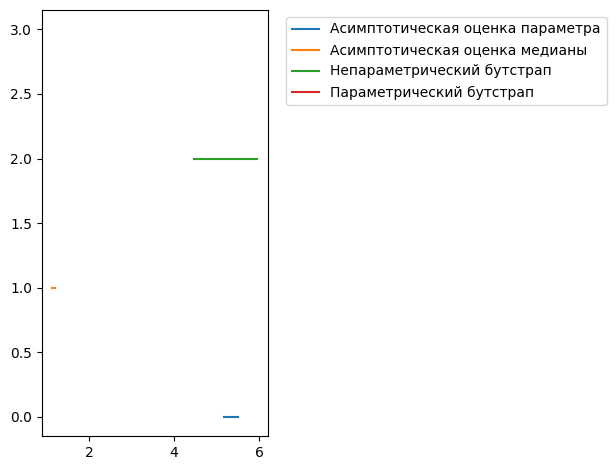

In [183]:
print_please()